<a href="https://colab.research.google.com/github/suraj-75/laughing-train/blob/main/Wine_Dataset_clustering_using_K_Mean_and_Agglomerative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [147]:
data = pd.read_csv('/content/wine-clustering.csv')

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [149]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [150]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [151]:
data.duplicated().sum()

np.int64(0)

<Axes: >

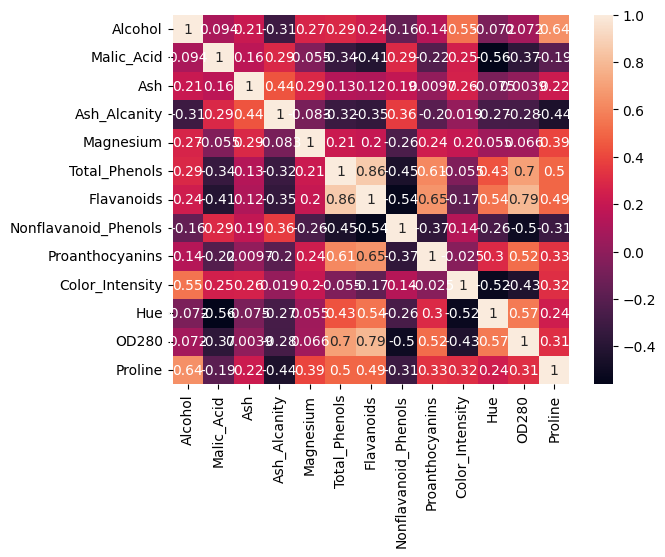

In [152]:
sns.heatmap(data.corr(), annot = True)

In [153]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)

In [154]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
pca_wine = PCA()
pca_wine.fit(data_scaled)

PCA()

In [155]:
pca_wine.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

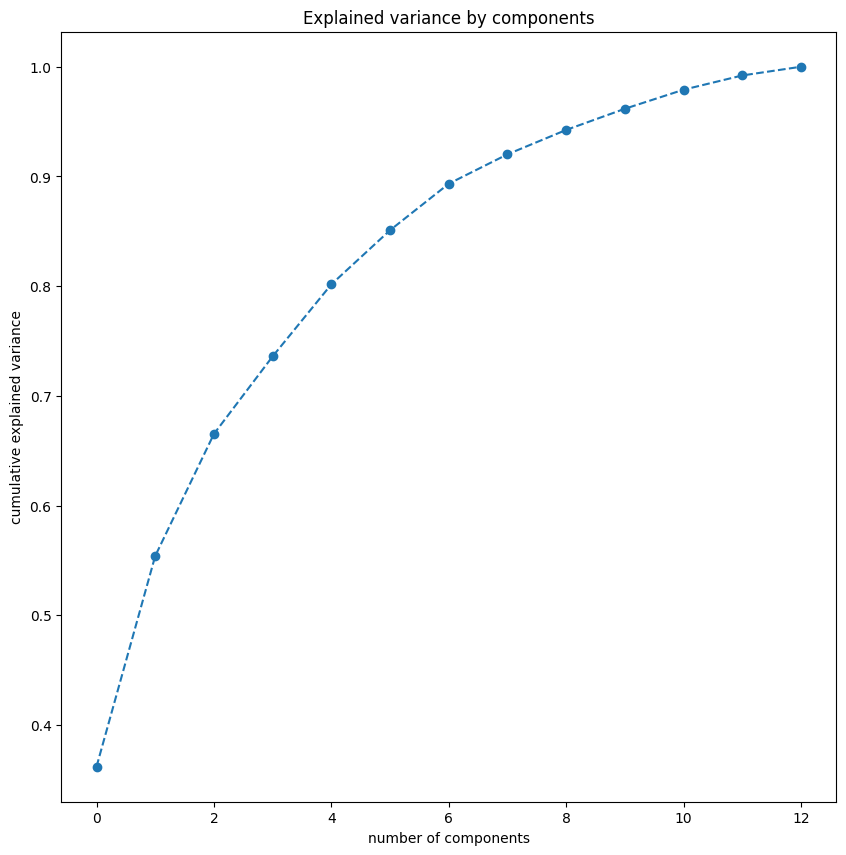

In [156]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca_wine.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained variance by components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [157]:
pca_wine = PCA(n_components=5)
pca_wine_transform = pca_wine.fit_transform(data_scaled)

In [158]:
pca_wine_data = pd.DataFrame(data=pca_wine_transform, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pca_wine.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294])

In [159]:
pca_wine_data.sample(10)

,PC1,PC2,PC3,PC4,PC5
55,2.469329,1.329008,0.513437,0.255349,0.912140
59,-0.928582,-3.073486,-4.585064,-1.051844,0.457124
88,-1.115111,-1.802247,0.959253,-0.331284,-0.731510
142,-2.985633,0.489218,0.946953,-1.036226,-0.585147
3,3.757066,2.756372,-0.176192,0.567983,-0.311842
166,-2.406111,2.592356,0.428226,-0.184335,0.447661
113,-0.457072,-2.269416,1.061339,-0.837432,-0.323451
36,1.384862,0.658640,0.458439,-1.284658,-0.205012
121,1.336322,0.253337,5.345388,0.239038,0.236503
42,3.070807,1.155919,-0.312758,0.550285,-0.304126


In [160]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(pca_wine_data)
  wcss.append(kmeans.inertia_)


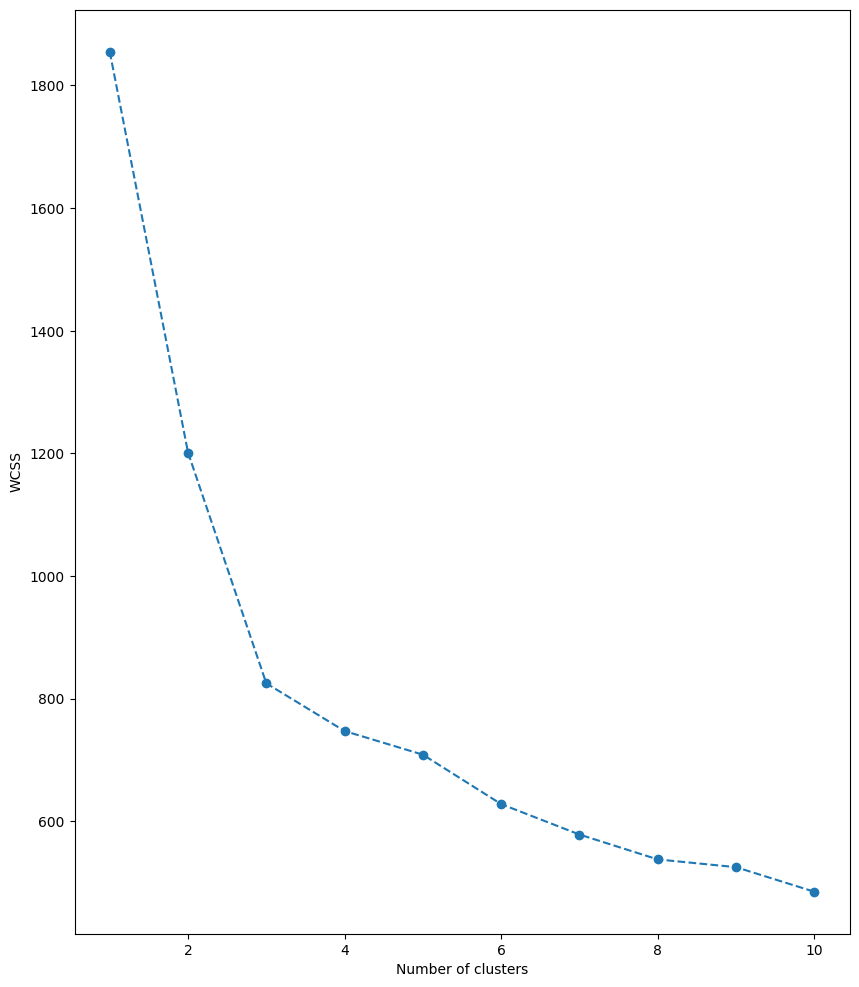

In [161]:
plt.figure(figsize = (10,12))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

By seeing the graph we select K = 3 as number of clusters(Elbow Methhod)

In [162]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(pca_wine_transform)

KMeans(n_clusters=3, random_state=42)

In [163]:
data = pd.concat([data.reset_index(drop = True), pca_wine_data.reset_index(drop = True)], axis = 1)
data = data.assign(cluster = kmeans.labels_)


In [164]:
data.sample(10)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,PC1,PC2,PC3,PC4,PC5,cluster
35,13.48,1.81,2.41,20.5,100,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920,1.903826,0.176711,0.450835,0.284114,-0.162949,2
45,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080,1.136166,1.777107,0.028706,0.691831,-0.060924,2
85,12.67,0.98,2.24,18.0,99,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450,0.787905,-2.026627,-0.254723,-0.809418,0.258853,0
167,12.82,3.37,2.30,19.5,88,1.48,0.66,0.40,0.97,10.26,0.72,1.75,685,-2.929085,1.274447,-1.213358,0.295316,-0.267350,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1.008908,0.869831,2.026688,-0.409766,0.298458,2
115,11.03,1.51,2.20,21.5,85,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407,0.482074,-3.871784,1.344271,-0.899910,-0.932358,0
69,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718,1.975620,-1.403283,-1.238276,-1.152306,4.186657,0
27,13.30,1.72,2.14,17.0,94,2.40,2.19,0.27,1.35,3.95,1.02,2.77,1285,1.235424,-0.089807,-1.386897,-0.495683,-0.375941,2
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,2.510874,0.918071,-1.770969,0.056270,-0.892257,2
64,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355,-0.609681,-1.908059,0.679358,-2.153076,-0.049903,0


In [167]:
data['cluster'] = data['cluster'].map({0: 'First', 1: 'Second', 2: 'Third'})

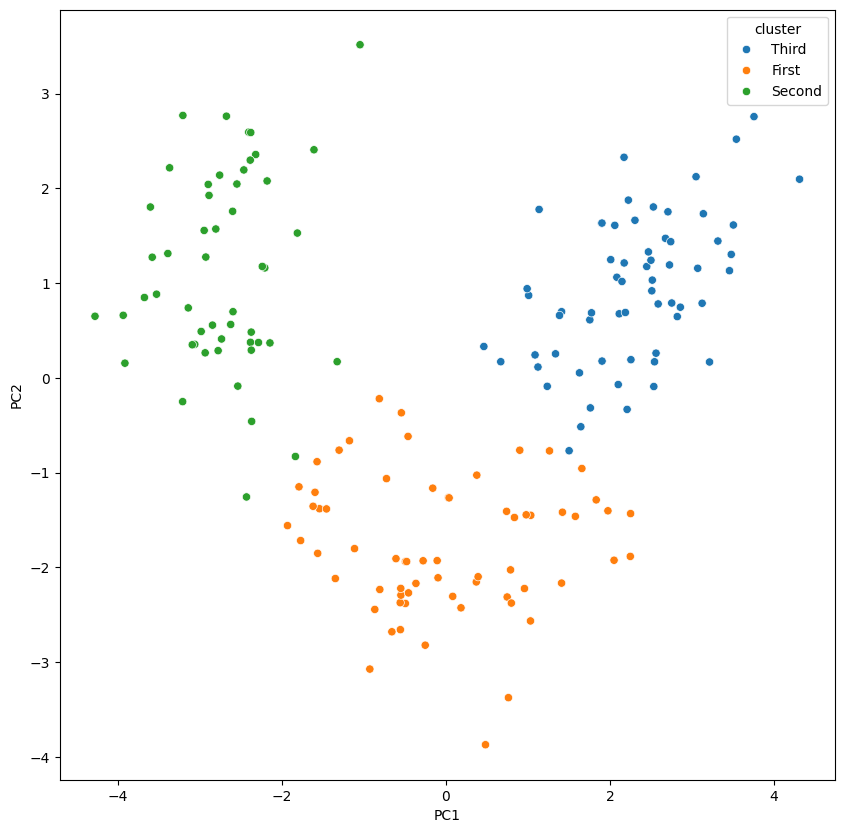

In [168]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=data)
plt.show()

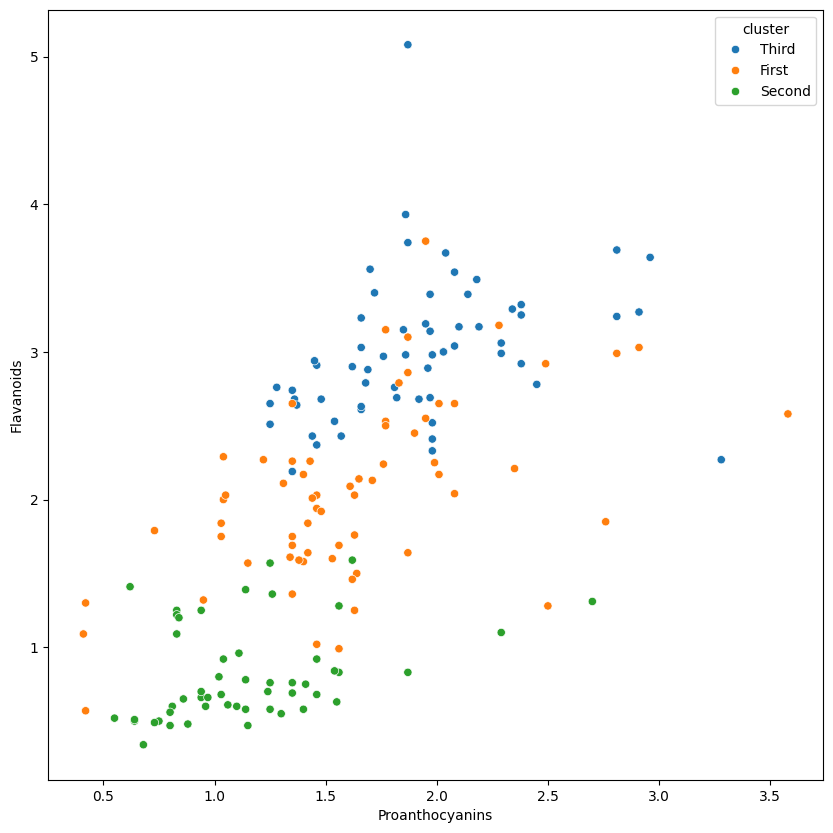

In [170]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Proanthocyanins', y='Flavanoids', hue='cluster', data=data)
plt.show()

In [171]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

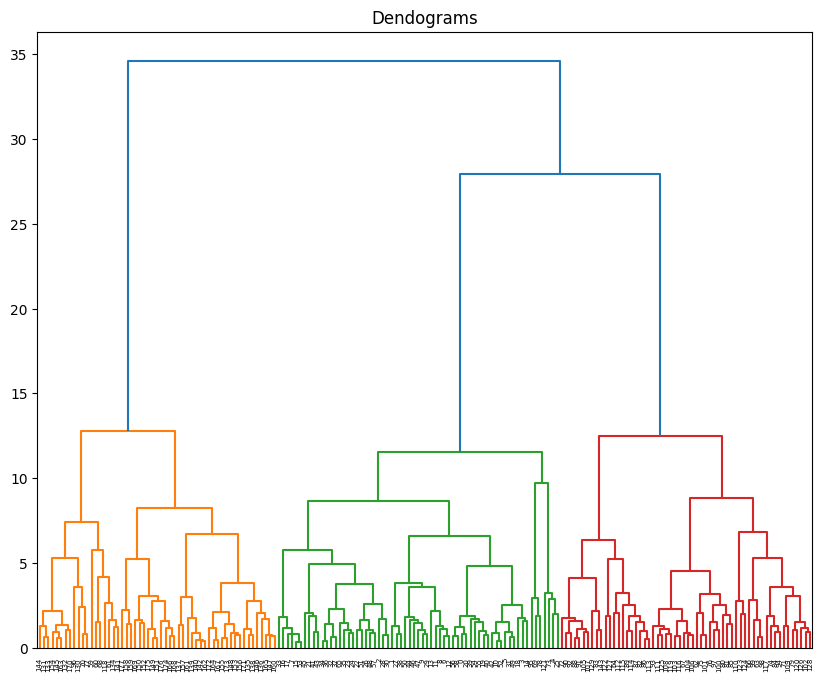

In [175]:
plt.figure(figsize=(10, 8))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(pca_wine_data, method='ward'))

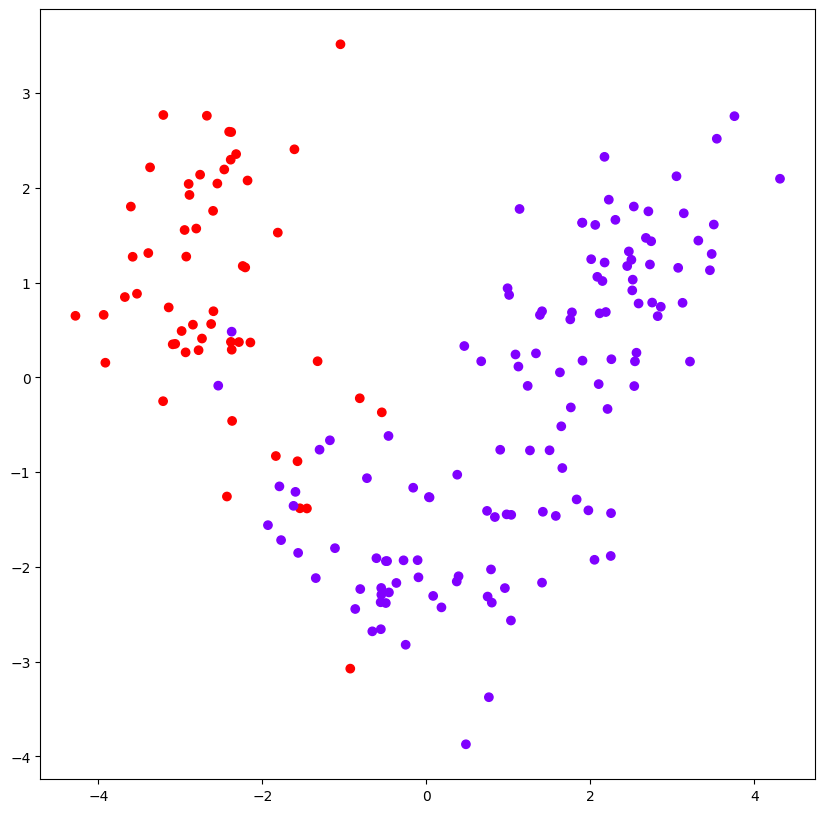

In [179]:
AC = AgglomerativeClustering(n_clusters=2)
plt.figure(figsize=(10,10))
plt.scatter(pca_wine_data['PC1'], pca_wine_data['PC2'], c=AC.fit_predict(pca_wine_data), cmap='rainbow')
plt.show()

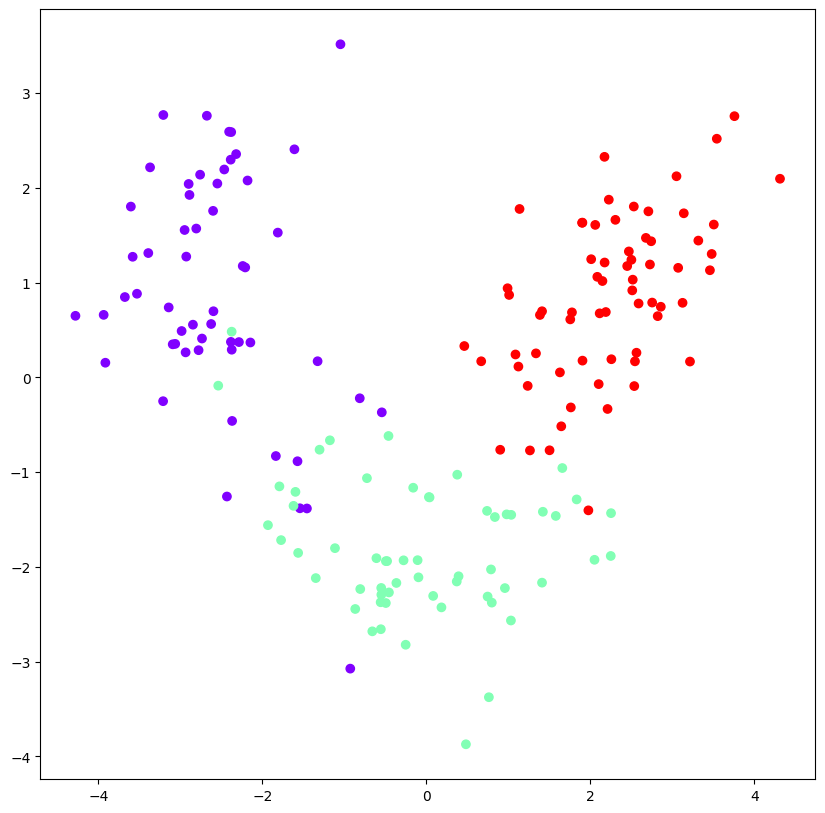

In [180]:
AC1 = AgglomerativeClustering(n_clusters=3)
plt.figure(figsize=(10,10))
plt.scatter(pca_wine_data['PC1'], pca_wine_data['PC2'], c=AC1.fit_predict(pca_wine_data), cmap='rainbow')
plt.show()

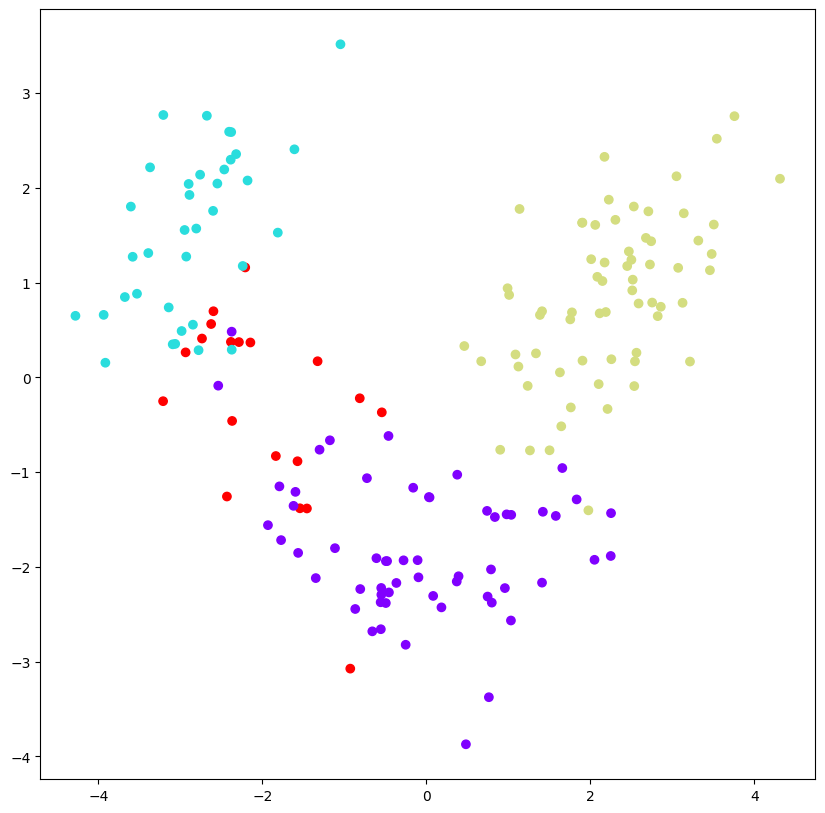

In [181]:
AC2 = AgglomerativeClustering(n_clusters=4)
plt.figure(figsize=(10,10))
plt.scatter(pca_wine_data['PC1'], pca_wine_data['PC2'], c=AC2.fit_predict(pca_wine_data), cmap='rainbow')
plt.show()

In [182]:
k = [2,3,4]
sil = []
for i in k:
  AC = AgglomerativeClustering(n_clusters=i)
  sil.append(silhouette_score(pca_wine_data, AC.fit_predict(pca_wine_data)))

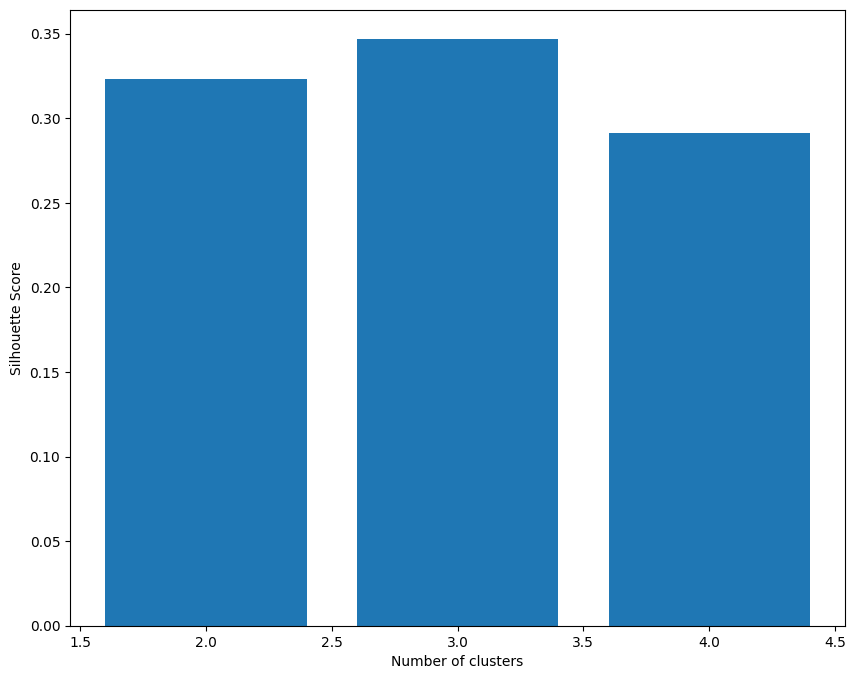

In [187]:
plt.figure(figsize=(10,8))
plt.bar(k, sil)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [189]:
AC1 = AgglomerativeClustering(n_clusters=3)
clusterAgg = AC1.fit_predict(pca_wine_data)
clusterAgg

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2,
       1, 1, 0, 2, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [190]:
data['clusterAgg'] = clusterAgg
data['clusterAgg'] = data['clusterAgg'].map({0: 'First', 1: 'Second', 2: 'Third'})


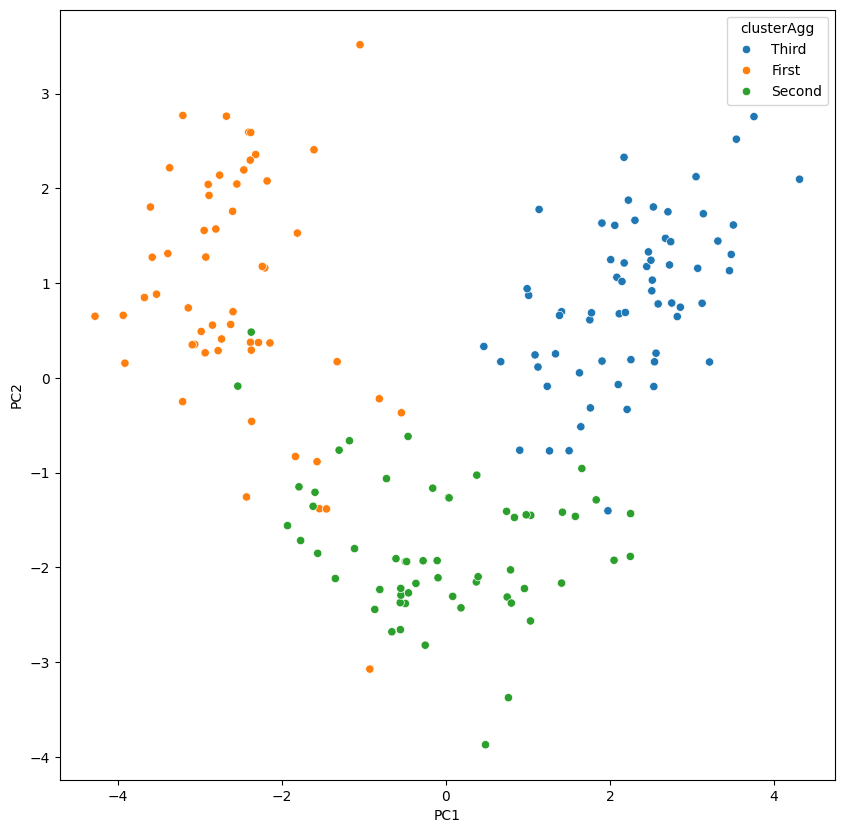

In [193]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='PC1', y='PC2', hue='clusterAgg', data=data)
plt.show()

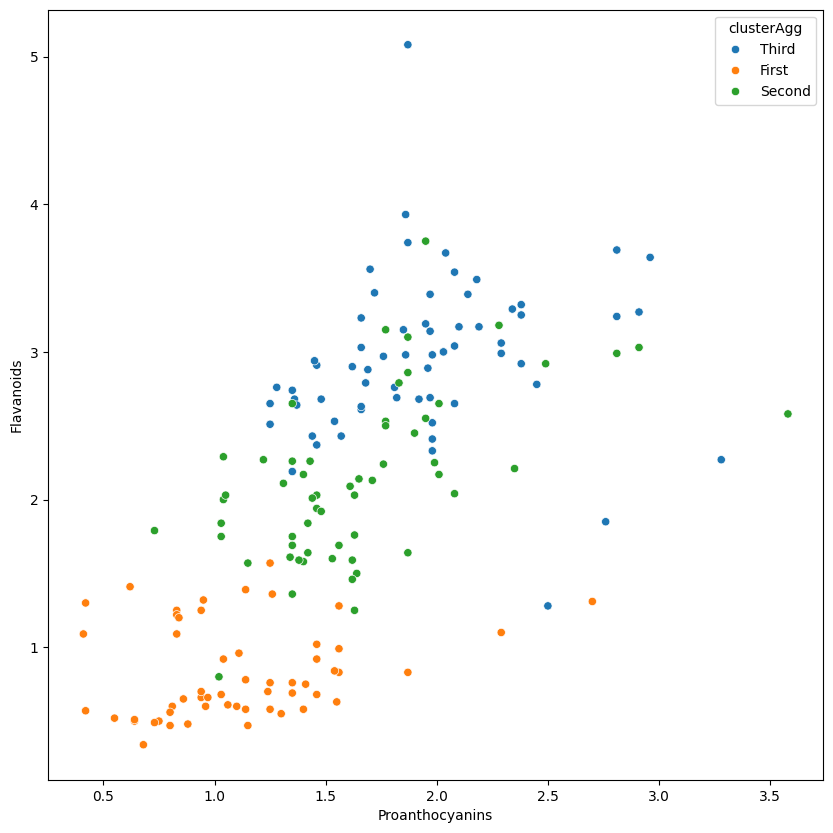

In [194]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Proanthocyanins', y='Flavanoids', hue='clusterAgg', data=data)
plt.show()

In [195]:
data = data.drop(columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], axis=1)
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster,clusterAgg
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,Third,Third
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,Third,Third
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,Third,Third
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,Third,Third
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,Third,Third
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,Second,First
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,Second,First
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,Second,First
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,Second,First
